# Phase 4 Project

In [1]:
# Name: Jiarong Chen
# Contact info: jiarong.chen.1@alumni.stonybrook.edu

Business problems: Using the movie lens 100k data to analyze the movies’ rating and make a movie recommendation system.

### Outline
Best Rating Movie
* Count the total movie rating and rating times
* Sort the movies by mean rating
* Determine the best movie base on mean rating and rating times

Best Movie Genre
* Build a genre data frame for all movies
* Fill the genre data frame with total rating and rating times
* Sort the genre data frame and determine the best one

Recommendation System
* Train a suitable algorithm
* Tune hyper parameter for this model
* Build a recommendation system

# Import data and Preview

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ratings = pd.read_csv('data/ratings.csv')
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [3]:
movies = pd.read_csv('data/movies.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9125 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB


In [4]:
# Drop unnecessary columns
ratings.drop(columns=['userId', 'timestamp'], inplace=True)
print('No. of Unique Movies    :', ratings['movieId'].nunique())
print('No. of Unique Ratings  :', ratings['rating'].nunique())

No. of Unique Movies    : 9066
No. of Unique Ratings  : 10


In [5]:
ratings.describe()

,movieId,rating
count,100004.000000,100004.000000
mean,12548.664363,3.543608
std,26369.198969,1.058064
min,1.000000,0.500000
25%,1028.000000,3.000000
50%,2406.500000,4.000000
75%,5418.000000,4.000000
max,163949.000000,5.000000


# Movie Rating Table

Only the movies with rating times over 10 are qualify for the best movie standard.

In [6]:
ratings['rating_times'] = None
ratings = ratings.fillna(1)

In [7]:
rating_movie = ratings.groupby('movieId').sum()
# Remove some movie rating times under 11
rating_movie = rating_movie.loc[rating_movie['rating_times']>10] 
# Take the mean rating for each movie
rating_movie['rating'] = rating_movie['rating'] / rating_movie['rating_times']
rating_movie.head()

,rating,rating_times
movieId,,
1,3.872470,247
2,3.401869,107
3,3.161017,59
4,2.384615,13
5,3.267857,56


In [8]:
rating_sorted = rating_movie.sort_values('rating', ascending=False)[:10]

In [9]:
# Join the rating table with movie table
rating_final = rating_sorted.join(movies.set_index('movieId'), how='left')

In [10]:
# Review the data
rating_final

,rating,rating_times,title,genres
movieId,,,,
1939,4.636364,11,"Best Years of Our Lives, The (1946)",Drama|War
3469,4.541667,12,Inherit the Wind (1960),Drama
858,4.487500,200,"Godfather, The (1972)",Crime|Drama
318,4.487138,311,"Shawshank Redemption, The (1994)",Crime|Drama
1948,4.458333,12,Tom Jones (1963),Adventure|Comedy|Romance
8132,4.454545,11,Gladiator (1992),Action|Drama
1945,4.448276,29,On the Waterfront (1954),Crime|Drama
1147,4.437500,16,When We Were Kings (1996),Documentary
926,4.434211,38,All About Eve (1950),Drama


# Visualization

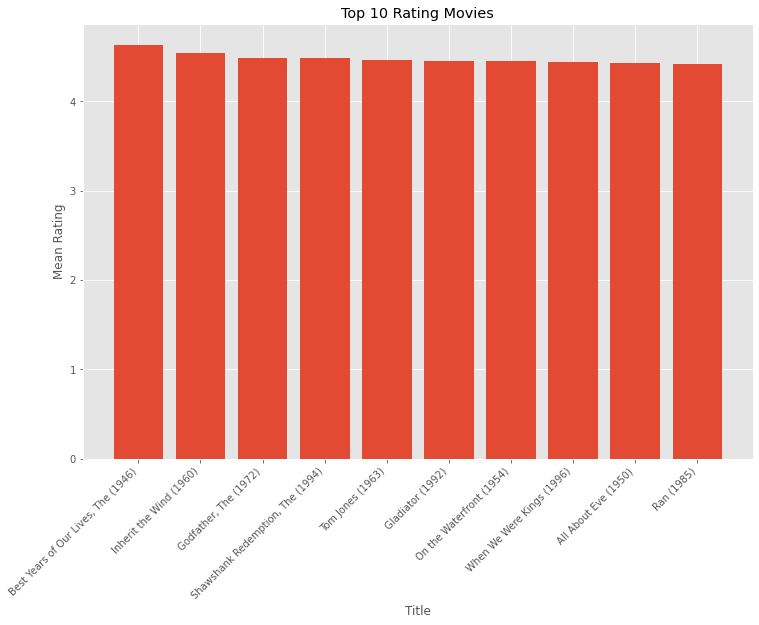

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.bar(x=rating_final['title'], height=rating_final['rating'])
plt.title('Top 10 Rating Movies')
plt.xlabel('Title')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

# Conclusion

From the table and graph above, we can see that the highest top 10 movies mean rating are very close which ranging from 4.42 to 4.64. Even though Best Years of Our Lives, The has the highest rating, I still recommend Godfather, The and Shawshank Redemption, The. Because these two movies only have to similar rating, but also have a larger rating times which can highly prove the rating quality. Therefore, I would say the best movie in this case is Godfather, The (1972).

# Import data and Preview

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [2]:
ratings = pd.read_csv('data/ratings.csv')
movies = pd.read_csv('data/movies.csv')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


# Join two Data Frame

In [4]:
rating_movie = movies.set_index('movieId').join(ratings.set_index('movieId'))
rating_movie = rating_movie[['genres', 'rating']]
rating_movie.head()

,genres,rating
movieId,,
1,Adventure|Animation|Children|Comedy|Fantasy,3.0
1,Adventure|Animation|Children|Comedy|Fantasy,4.0
1,Adventure|Animation|Children|Comedy|Fantasy,5.0
1,Adventure|Animation|Children|Comedy|Fantasy,2.0
1,Adventure|Animation|Children|Comedy|Fantasy,3.0


In [5]:
rating_movie.shape

(100063, 2)

In [6]:
# There are some missing rating value after joining two tables
rating_movie.isna().sum()

genres     0
rating    59
dtype: int64

In [7]:
rating_movie.dropna(inplace=True)

# Normalization the genres column

In [8]:
#Make a list to store genres and will be use as column
list_genres = []
for genres in movies['genres'].str.split(pat='|'):
    for genre in genres:
        if genre not in list_genres:
            list_genres.append(genre)

In [9]:
print ('Number of total genres: ', len(list_genres))

Number of total genres:  20


In [10]:
#Make it into a df and preview
df_genres = pd.DataFrame(columns=['totalRating', 'meanRating', 'count'], index=list_genres)
df_genres.fillna(0, inplace=True)
df_genres

,totalRating,meanRating,count
Adventure,0,0,0
Animation,0,0,0
Children,0,0,0
Comedy,0,0,0
Fantasy,0,0,0
Romance,0,0,0
Drama,0,0,0
Action,0,0,0
Crime,0,0,0
Thriller,0,0,0


In [11]:
# Split the items under genres columns for further using
rating_movie['genres'] = rating_movie['genres'].map(lambda x: x.split('|'))

In [12]:
rating_movie.head()

,genres,rating
movieId,,
1,"[Adventure, Animation, Children, Comedy, Fantasy]",3.0
1,"[Adventure, Animation, Children, Comedy, Fantasy]",4.0
1,"[Adventure, Animation, Children, Comedy, Fantasy]",5.0
1,"[Adventure, Animation, Children, Comedy, Fantasy]",2.0
1,"[Adventure, Animation, Children, Comedy, Fantasy]",3.0


In [13]:
range(len(rating_movie))

range(0, 100004)

In [14]:
rating_movie.reset_index(inplace=True)
rating_movie.head()

,movieId,genres,rating
0,1,"[Adventure, Animation, Children, Comedy, Fantasy]",3.0
1,1,"[Adventure, Animation, Children, Comedy, Fantasy]",4.0
2,1,"[Adventure, Animation, Children, Comedy, Fantasy]",5.0
3,1,"[Adventure, Animation, Children, Comedy, Fantasy]",2.0
4,1,"[Adventure, Animation, Children, Comedy, Fantasy]",3.0


In [15]:
# Fill in the df_genres table by checking every movie rating in rating_movie table
for idx, vote in enumerate(rating_movie['genres']):
    for genre in vote:
        for i in df_genres.index:
            if i==genre:
                df_genres.loc[i, 'count'] += 1
                df_genres.loc[i, 'totalRating'] += rating_movie.loc[idx, 'rating']

In [17]:
df_genres['meanRating'] = df_genres['totalRating'] / df_genres['count']

In [19]:
# Sort the data by mean rating column
df_final = df_genres.sort_values('meanRating', ascending=False)

In [20]:
df_final

,totalRating,meanRating,count
Film-Noir,4509.5,3.955702,1140
War,19181.5,3.817214,5025
Documentary,5964.0,3.813299,1564
(no genres listed),68.0,3.777778,18
Drama,164767.0,3.681780,44752
Crime,59853.0,3.679639,16266
Mystery,28056.5,3.679541,7625
Animation,22434.5,3.636062,6170
Musical,16993.5,3.598793,4722
IMAX,11270.5,3.571134,3156


# Visualization

In [22]:
# Drop no genres listed row
df_final.drop(index='(no genres listed)', inplace=True)

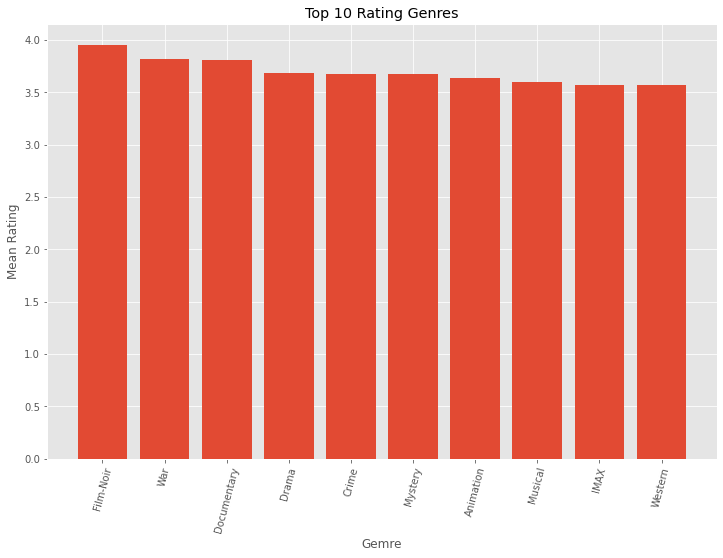

In [23]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.bar(x=df_final.index[:10], height=df_final['meanRating'][:10])
plt.title('Top 10 Rating Genres')
plt.xlabel('Gemre')
plt.ylabel('Mean Rating')
plt.xticks(rotation=75)
plt.show()

The best genre in this case is Film-Noir with mean rating around 3.96.

# Import data and preview

In [9]:
# Importing relevant libraries
import pandas as pd
import numpy as np

from surprise.model_selection import cross_validate
from surprise.model_selection import RandomizedSearchCV, GridSearchCV

from surprise.prediction_algorithms import SVD, SVDpp, NMF
from surprise.prediction_algorithms import SlopeOne, CoClustering
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline, KNNWithZScore

In [10]:
ratings = pd.read_csv('data/ratings.csv')
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [11]:
# Drop unnecessary columns
ratings.drop(columns='timestamp', inplace=True)

In [12]:
print('No. of Unique Users    :', ratings['userId'].nunique())
print('No. of Unique Movies    :', ratings['movieId'].nunique())
print('No. of Unique Ratings  :', ratings['rating'].nunique())

No. of Unique Users    : 671
No. of Unique Movies    : 9066
No. of Unique Ratings  : 10


In [13]:
ratings.describe()

,userId,movieId,rating
count,100004.000000,100004.000000,100004.000000
mean,347.011310,12548.664363,3.543608
std,195.163838,26369.198969,1.058064
min,1.000000,1.000000,0.500000
25%,182.000000,1028.000000,3.000000
50%,367.000000,2406.500000,4.000000
75%,520.000000,5418.000000,4.000000
max,671.000000,163949.000000,5.000000


In [14]:
# Transform the dataset into something compatible with surprise
from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(ratings,reader)

In [15]:
# Preview
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  671 

Number of items:  9066


# Algorithm

In [16]:
# k-NN Based Algorithm
knnbasic_cv = cross_validate(KNNBasic(), data, cv=3, n_jobs=5, verbose=False)
knnbaseline_cv = cross_validate(KNNBaseline(), data, cv=3, n_jobs=5, verbose=False)
knnmeans_cv = cross_validate(KNNWithMeans(), data, cv=3, n_jobs=5, verbose=False)
knnz_cv = cross_validate(KNNWithZScore(), data, cv=3, n_jobs=5, verbose=False)

In [17]:
knnbaseline_cv = cross_validate(KNNBaseline(), data, cv=3, n_jobs=5, verbose=False)

In [18]:
knnbaseline_cv

{'test_rmse': array([0.90276128, 0.90938877, 0.90211728]),
 'test_mae': array([0.69292685, 0.69620711, 0.69024466]),
 'fit_time': (0.17169523239135742, 0.31277012825012207, 0.2308049201965332),
 'test_time': (5.286005020141602, 5.038769960403442, 4.076486110687256)}

In [19]:
np.mean(knnbaseline_cv['fit_time'])

0.23842342694600424

In [20]:
# Matrix Factorization Based Algorithms
svd_cv = cross_validate(SVD(), data, cv=3, n_jobs=5, verbose=False)
nmf_cv = cross_validate(NMF(), data, cv=3, n_jobs=5, verbose=False)
svdpp_cv = cross_validate(SVDpp(), data, cv=3, n_jobs=5, verbose=False)

In [21]:
# Other Collaborative Filtering Algorithms
slope_cv = cross_validate(SlopeOne(), data, cv=3, n_jobs=5, verbose=False)
coclus_cv = cross_validate(CoClustering(), data, cv=3, n_jobs=5, verbose=False)

In [25]:
np.mean(knnbasic_cv['fit_time'])

0.1262818972269694

In [29]:
# Comparison of all algorithms on RMSE and MAE(to dataframe)
print('Algorithm\t RMSE\t\t MAE\t\t Fit Time')
print()
print('KNN Basic', '\t', round(knnbasic_cv['test_rmse'].mean(), 4), '\t', round(knnbasic_cv['test_mae'].mean(), 4), '\t', round(np.mean(knnbasic_cv['fit_time']), 4))
print('KNN Base Line', '\t', round(knnbaseline_cv['test_rmse'].mean(), 4), '\t', round(knnbaseline_cv['test_mae'].mean(), 4), '\t', round(np.mean(knnbaseline_cv['fit_time']), 4))
print('KNN Means', '\t', round(knnmeans_cv['test_rmse'].mean(), 4), '\t', round(knnmeans_cv['test_mae'].mean(), 4), '\t', round(np.mean(knnmeans_cv['fit_time']).mean(), 4))
print('KNN ZScore', '\t', round(knnz_cv['test_rmse'].mean(), 4), '\t', round(knnz_cv['test_mae'].mean(), 4), '\t', round(np.mean(knnz_cv['fit_time']).mean(), 4))
print()
print('SVD', '\t\t', round(svd_cv['test_rmse'].mean(), 4), '\t', round(svd_cv['test_mae'].mean(), 4), '\t\t', round(np.mean(svd_cv['fit_time']), 4))
print('SVDpp', '\t\t', round(svdpp_cv['test_rmse'].mean(), 4), '\t\t', round(svdpp_cv['test_mae'].mean(), 4), '\t', round(np.mean(svdpp_cv['fit_time']), 4))
print('NMF', '\t\t', round(nmf_cv['test_rmse'].mean(), 4), '\t', round(nmf_cv['test_mae'].mean(), 4), '\t', round(np.mean(nmf_cv['fit_time']), 4))
print()
print('SlopeOne', '\t', round(slope_cv['test_rmse'].mean(), 4), '\t\t', round(slope_cv['test_mae'].mean(), 4), '\t', round(np.mean(slope_cv['fit_time']), 4))
print('CoClustering', '\t', round(coclus_cv['test_rmse'].mean(), 4), '\t', round(coclus_cv['test_mae'].mean(), 4), '\t', round(np.mean(coclus_cv['fit_time']), 4))
print()

Algorithm	 RMSE		 MAE		 Fit Time

KNN Basic 	 0.9765 	 0.7518 	 0.1263
KNN Base Line 	 0.9048 	 0.6931 	 0.2384
KNN Means 	 0.9271 	 0.7098 	 0.1493
KNN ZScore 	 0.9275 	 0.7058 	 0.2704

SVD 		 0.9039 	 0.697 		 7.5432
SVDpp 		 0.892 		 0.6845 	 601.5069
NMF 		 0.9584 	 0.7366 	 7.6169

SlopeOne 	 0.938 		 0.7188 	 7.9913
CoClustering 	 0.9726 	 0.7539 	 2.6456



By using the same parameters (cv=3, n_jobs=5, verbose=False) to evaluate, we find that SVDpp is the best algorithm in this case. SVDpp algorithm has the lowest RMSE(0.892) and lowest MAE (0.6845). Also, SVDpp has the longest fit time which over 10 minutes. The time it cost is much longer than other algorithms.

# Tune Hyperparameter

In [30]:
## Perform a gridsearch with SVDpp
params = {'n_epochs': [10, 20], 
        'lr_all': [0.007, 0.009]}
g_s_svd = GridSearchCV(SVDpp, param_grid=params, cv=3, n_jobs=5)
g_s_svd.fit(data)

In [31]:
# Print out optimal parameters for SVDpp after GridSearch
print(g_s_svd.best_score)
print(g_s_svd.best_params)

{'rmse': 0.8914524747832285, 'mae': 0.6850484764220486}
{'rmse': {'n_epochs': 10, 'lr_all': 0.009}, 'mae': {'n_epochs': 20, 'lr_all': 0.007}}


After the Grid SearchCV, we have to option to get the best RMSE and MAE. Here I choose the lowest RMSE one with n_epochs=10 and lr_all=0.009

# Recommendation System

In [32]:
# Import movies data
movies = pd.read_csv('./data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
# Apply our model
svd = SVD(n_epochs= 10, lr_all=0.009)
svd.fit(dataset)

In [34]:
svd.predict(2, 4)

Prediction(uid=2, iid=4, r_ui=None, est=2.4212871010671844, details={'was_impossible': False})

In [35]:
def movie_rater(movie_df,num, genre=None):
    userID = 1000
    rating_list = []
    while num > 0:
        if genre:
            movie = movie_df[movie_df['genres'].str.contains(genre)].sample(1)
        else:
            movie = movie_df.sample(1)
        print(movie)
        rating = input('How do you rate this movie on a scale of 1-5, press n if you have not seen :\n')
        if rating == 'n':
            continue
        else:
            rating_one_movie = {'userId':userID,'movieId':movie['movieId'].values[0],'rating':rating}
            rating_list.append(rating_one_movie) 
            num -= 1
    return rating_list

In [36]:
# Obtain user ratings
user_rating = movie_rater(movies, 4, 'Comedy')

      movieId                      title                  genres
7682    82150  Bunny and the Bull (2009)  Adventure|Comedy|Drama
How do you rate this movie on a scale of 1-5, press n if you have not seen :
4
      movieId                            title              genres
8463   106782  Wolf of Wall Street, The (2013)  Comedy|Crime|Drama
How do you rate this movie on a scale of 1-5, press n if you have not seen :
5
      movieId                            title          genres
4055     5299  My Big Fat Greek Wedding (2002)  Comedy|Romance
How do you rate this movie on a scale of 1-5, press n if you have not seen :
4
      movieId                                 title  genres
7719    83506  Ricky Gervais Live 4: Science (2010)  Comedy
How do you rate this movie on a scale of 1-5, press n if you have not seen :
4


### pd.DataFrame(user_rating)

In [37]:
## Add the new ratings to the original ratings DataFrame
new_ratings_df = ratings.append(user_rating,ignore_index=True)
new_data = Dataset.load_from_df(new_ratings_df,reader)

In [38]:
# Train a model using the new combined DataFrame
svd_ = SVD(n_epochs= 10, lr_all=0.009)
svd_.fit(new_data.build_full_trainset())

In [39]:
# Make predictions for the user
# Create a list of tuples in the format (movie_id, predicted_score)
list_of_movies = []
for m_id in ratings['movieId'].unique():
    list_of_movies.append( (m_id,svd_.predict(1000,m_id)[3]))

In [40]:
# Order the predictions from highest to lowest rated

ranked_movies = sorted(list_of_movies, key=lambda x:x[1], reverse=True)
ranked_movies

[(318, 4.717832555742675),
 (745, 4.701231518918308),
 (858, 4.622437580944575),
 (922, 4.619318268557704),
 (3462, 4.615361729486133),
 (923, 4.595327550448475),
 (1060, 4.593834364359228),
 (50, 4.589897227423514),
 (1217, 4.577342243356241),
 (68237, 4.574219846426196),
 (1945, 4.571246790164756),
 (913, 4.5545874645169295),
 (1221, 4.551884248588042),
 (1228, 4.533952808742738),
 (953, 4.526702788791651),
 (1148, 4.521456963223108),
 (969, 4.515397275880574),
 (2300, 4.514167186468324),
 (2318, 4.507809680354841),
 (1197, 4.498557348746794),
 (527, 4.495740630645469),
 (1225, 4.489627462478539),
 (2064, 4.48781079332199),
 (6016, 4.477539059956877),
 (31658, 4.473931137946025),
 (2542, 4.473110715773745),
 (1203, 4.470146117900444),
 (1293, 4.465214918377213),
 (2329, 4.459970680304367),
 (908, 4.459631701439259),
 (1276, 4.458809357786575),
 (968, 4.4532512586522595),
 (905, 4.452939544065077),
 (1968, 4.452710702332326),
 (1223, 4.447369796310488),
 (7147, 4.4465950582367),
 (585

In [41]:
# Return the top n recommendations using the 
def recommended_movies(user_ratings,movie_title_df,n):
        for idx, rec in enumerate(user_ratings):
            title = movie_title_df.loc[movie_title_df['movieId'] == int(rec[0])]['title'].values
            print('Recommendation # ', idx+1, ': ', title[0], '\n')
            n-= 1
            if n == 0:
                break
            
recommended_movies(ranked_movies,movies,5)

Recommendation #  1 :  Shawshank Redemption, The (1994) 

Recommendation #  2 :  Wallace & Gromit: A Close Shave (1995) 

Recommendation #  3 :  Godfather, The (1972) 

Recommendation #  4 :  Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) 

Recommendation #  5 :  Modern Times (1936) 

